# Customer Churn Analysis
Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 



# IMPORTING THE DATASETS

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('churns_data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Top 5 heads of the Dataset.

In [3]:
df.shape

(7043, 21)

 7043 rows and 21 columns in the dataset.

# CHECKING NULL VALUES IN THE DATAFRAME

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No null values in dataset.

<AxesSubplot:>

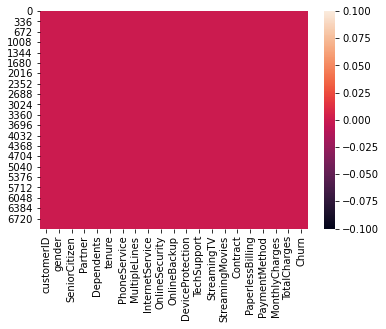

In [5]:
# Checking null values through heatmap
sns.heatmap(df.isnull())

No null values in the dataset.

# CHECKING DATATYPES OF THE COLUMNS

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

we can observe that the 'total charges' has continuous data but it is an object type. Let us handle this column.

In [7]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [8]:
df.loc[df['TotalCharges']==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


 we saw the some columns have space as the value, and we we know python will consider space as a object.

In [9]:
#replacing the space in TotalCharges coulmn by null values

df['TotalCharges']=df['TotalCharges'].replace(" ",np.nan)

In [10]:
# checking null values again 
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Now after removing the space with null values , Total Charges column has been converted into object to float. and, we have 11 null values in TotalCharges column.



# HANDLING NULL VALUES and replacing it with the mean of the column, as the column is continuous in nature

In [11]:
# converting the column type from object to float
df['TotalCharges']=df['TotalCharges'].astype(float)

In [12]:
df['TotalCharges']=df['TotalCharges'].fillna(np.mean(df['TotalCharges']))

In [13]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

now we have no null values in the dataset.

In [14]:
#final datatype
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# MAKING DATAFRAME FOR NOMINAL DATA

In [15]:
df_nominal=df[['customerID','gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn','SeniorCitizen']]

In [16]:
df_nominal.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn',
       'SeniorCitizen'],
      dtype='object')

# VISUALIZATION OF NOMINAL DATA BY COUNT PLOT

Male      3555
Female    3488
Name: gender, dtype: int64


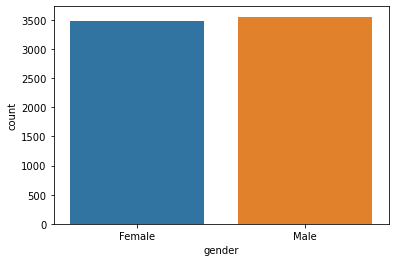

In [23]:
ax=sns.countplot(x='gender',data=df_nominal)
print(df_nominal['gender'].value_counts())

From the above observations the total number of male is 3555 and toTAL number of female customer is 3488, both the data is approximately same.

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


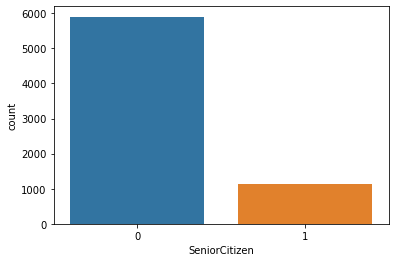

In [24]:
ax=sns.countplot(x='SeniorCitizen',data=df_nominal)
print(df_nominal['SeniorCitizen'].value_counts())

0 indicates the no seior citizen and 1 indicates the senior citizen. from the above observations the total number of younger customer is 5901 and total number of senior citizen is 1142.

No     3641
Yes    3402
Name: Partner, dtype: int64


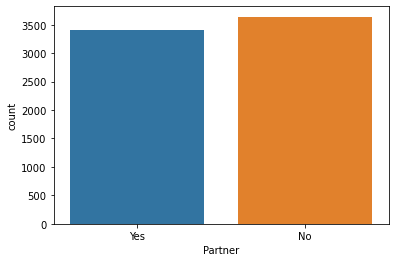

In [25]:
ax=sns.countplot(x='Partner',data=df_nominal)
print(df_nominal['Partner'].value_counts())

From the above observations the total number of married customer is 3402 and the total number of unmarried customer is 3641.

No     4933
Yes    2110
Name: Dependents, dtype: int64


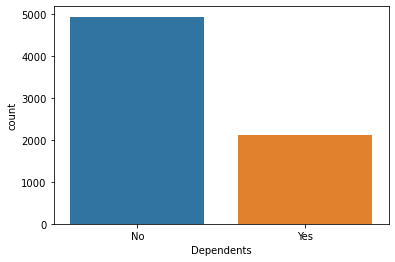

In [27]:
ax=sns.countplot(x='Dependents',data=df_nominal)
print(df_nominal['Dependents'].value_counts())

From the above observations the total number of dependent customer is 2110 and the total number of independent customer is 4933.

Yes    6361
No      682
Name: PhoneService, dtype: int64


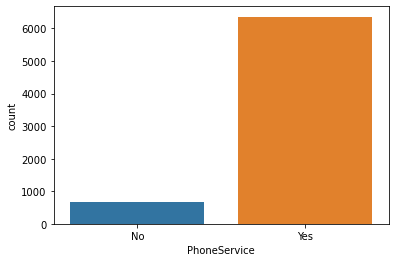

In [28]:
ax=sns.countplot(x='PhoneService',data=df_nominal)
print(df_nominal['PhoneService'].value_counts())

From the above observations the total number of customer using phone service is 6361 and total number of customer not using phone service is 682.

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


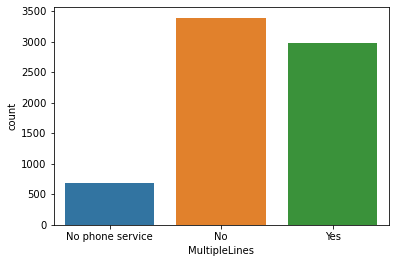

In [29]:
ax=sns.countplot(x='MultipleLines',data=df_nominal)
print(df_nominal['MultipleLines'].value_counts())

From the above observations total number of customer notusing any phone service is 682, using no multiple services is 3390, and using multiple services is 2971.

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


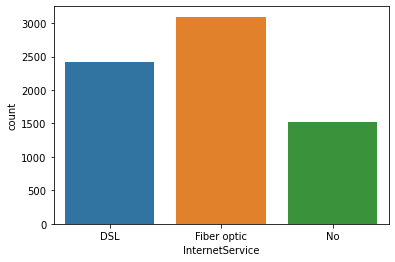

In [30]:
ax=sns.countplot(x='InternetService',data=df_nominal)
print(df_nominal['InternetService'].value_counts())

From the above observations total number of customer not using any internet services is 1526, fibre optic internet services is 3096 and using DSL is 2421.

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


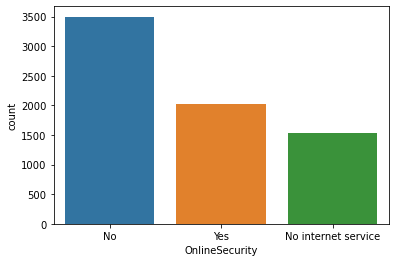

In [31]:
ax=sns.countplot(x='OnlineSecurity',data=df_nominal)
print(df_nominal['OnlineSecurity'].value_counts())

From the above observations total number of customer not using any internet services is 1526, usimg online security is 2019 , and using no online security is 3498.

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


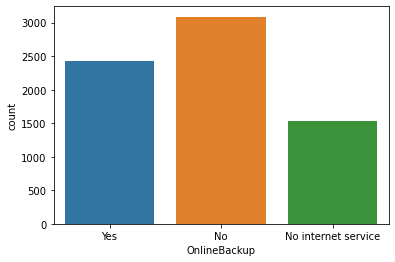

In [32]:
ax=sns.countplot(x='OnlineBackup',data=df_nominal)
print(df_nominal['OnlineBackup'].value_counts())

From the above observations total number of customer not using any internet services is 1526, using online backup is 2429 andnot using online backup is 3088.

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


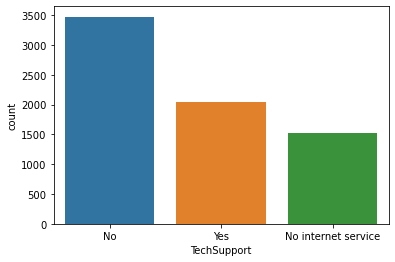

In [33]:
ax=sns.countplot(x='TechSupport',data=df_nominal)
print(df_nominal['TechSupport'].value_counts())

From the above observations total number of customer not using any internet services is 1526, using tech support is 2044 and not using tech support is 3473.

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


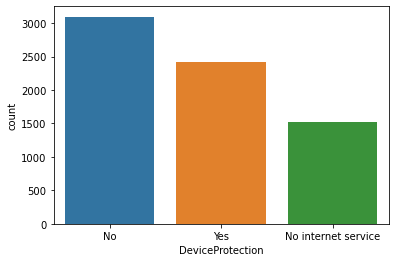

In [34]:
ax=sns.countplot(x='DeviceProtection',data=df_nominal)
print(df_nominal['DeviceProtection'].value_counts())

From the above observations total number of customer not using any internet services is 1526, using device protection is 2422 and not using device protection is 3095.

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


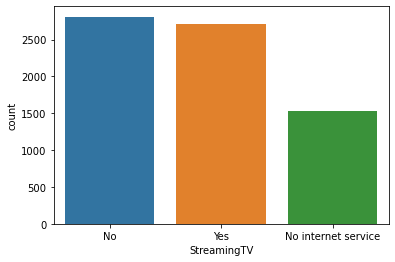

In [35]:
ax=sns.countplot(x='StreamingTV',data=df_nominal)
print(df_nominal['StreamingTV'].value_counts())

From the above observations total number of customer not using any internet services is 1526, using streamingTV is 2707 and not using streamingTV is 2810.

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


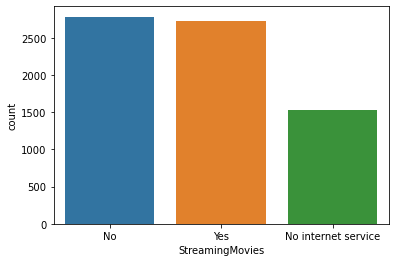

In [36]:
ax=sns.countplot(x='StreamingMovies',data=df_nominal)
print(df_nominal['StreamingMovies'].value_counts())

From the above observations total number of customer not using any internet services is 1526, using streaming movies is 2732 and not using streaming movies is 2785.

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


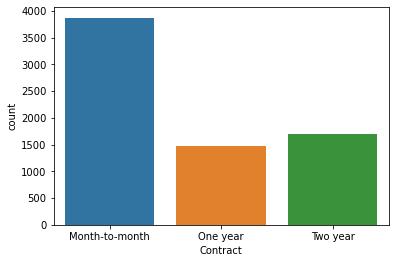

In [37]:
ax=sns.countplot(x='Contract',data=df_nominal)
print(df_nominal['Contract'].value_counts())

From the above observations total numbers of customers applied for month-to-month contract is 3875, one year contract is 1473 and two year contract is 1695.

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


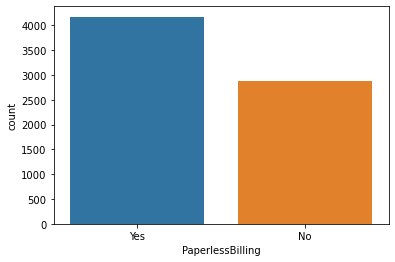

In [38]:
ax=sns.countplot(x='PaperlessBilling',data=df_nominal)
print(df_nominal['PaperlessBilling'].value_counts())

From the above observations total number of customer not using paperless billing is 2872, and using paperless billing is 4171.

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


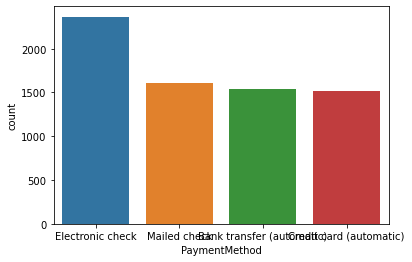

In [39]:
ax=sns.countplot(x='PaymentMethod',data=df_nominal)
print(df_nominal['PaymentMethod'].value_counts())

From the above observations total number of customer using electronic check payment method is 2365, mailed check payment method is 1612, bank transfer payment method is 1544 and credit card payment method is 1522.



No     5174
Yes    1869
Name: Churn, dtype: int64


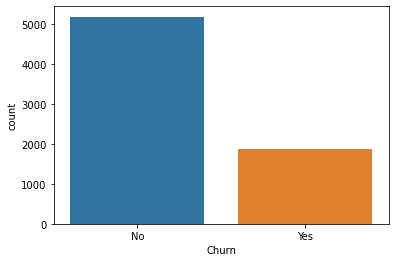

In [40]:
ax=sns.countplot(x='Churn',data=df_nominal)
print(df_nominal['Churn'].value_counts())

From the above observations total number of customer have not have chances to leaving is 5174 and the chances of leaving customer is 1869.

# MAKING DATAFRAME OF THE ORDINAL DATA

In [41]:
df_visualization_ordinal=df[['customerID','tenure']].copy

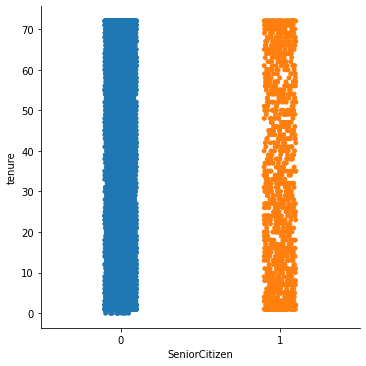

In [42]:
sns.catplot(x='SeniorCitizen',y='tenure',data=df)

distribution of data is approx similar. both the younguster and senior citizen has not much diffrence according to the tenure.



# CHECKING THE DISTRIBUTION OF THE FLOAT TYPE COLUMNS

In [43]:
df_continuous=df[['MonthlyCharges','TotalCharges']].copy()

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

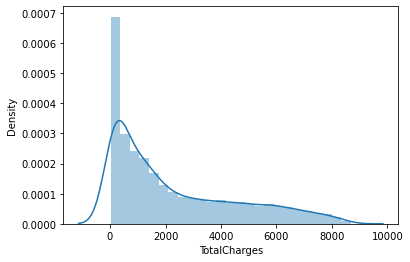

In [44]:
sns.distplot(df_continuous['TotalCharges'],kde=True)

The total charges starts from 0 to approx 9000.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

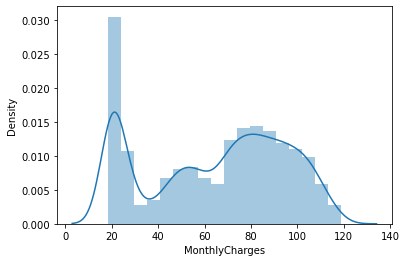

In [45]:
sns.distplot(df_continuous['MonthlyCharges'],kde=True)

Monthly charges ranges from 19 to approx 125 .

# ENCODING THE DATAFRAME TO CONVERT STRING COLUMNS TO NUMERIC COLUMNS

In [17]:
from sklearn.preprocessing import OrdinalEncoder

In [18]:
enc =OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [19]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,3367.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


string columns has been converted into numeric column.

# STATISTICAL SUMMARY

In [20]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


<AxesSubplot:>

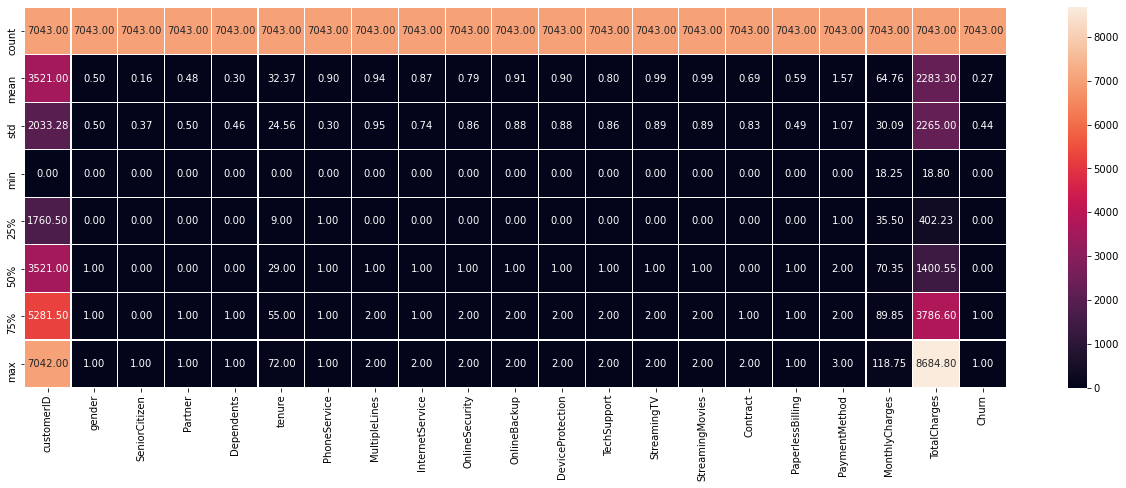

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths =0.1,fmt='0.2f')

in total charges column , there is some difference values than the normal.

# CORRELATION MATRIX

In [22]:
cor=df.corr()
cor

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,-0.000270,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309


<AxesSubplot:>

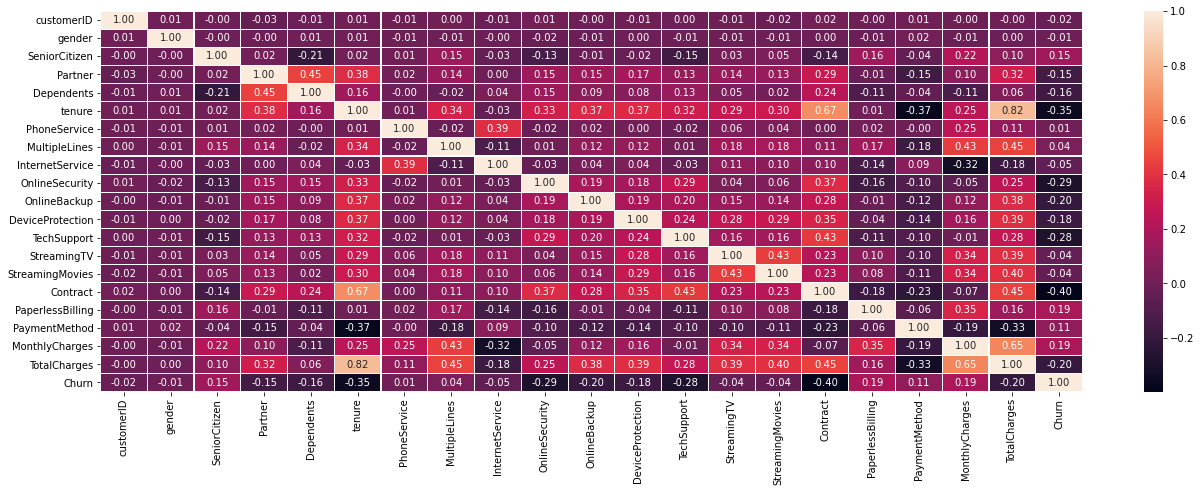

In [23]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths =0.1,fmt='0.2f')

No columns is showing correletations with target columns churns.

tenure is positively correlated with total charges.

Monthly charges column is positively correlated with total charges.

Payment method is negatively correlated with total charges.

Internet service is negatively correlated with total charges.

# CHECKING SKEWNESS

In [24]:
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

columns is in range between +.5 and -.5 are not skewed.

skewed columns are:

senior ctizen

Dependents

Phone service

contracts

Total charges

churn
Total charges column is the target and all the column is of categorical type then skewness is not to be treated.

# CHECKING OUTLIERS on integer and float type column.


In [25]:
df.dtypes

customerID          float64
gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

<AxesSubplot:>

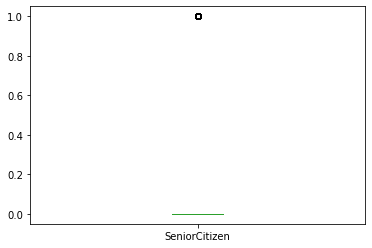

In [26]:
df['SeniorCitizen'].plot.box()

outlier is present but due to categorical column outlier will not be removed

<AxesSubplot:>

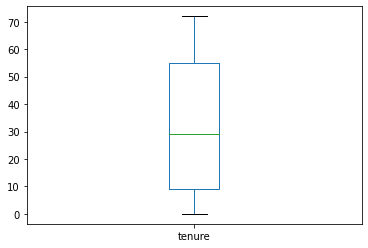

In [56]:
df['tenure'].plot.box()


outlier is not present.

<AxesSubplot:>

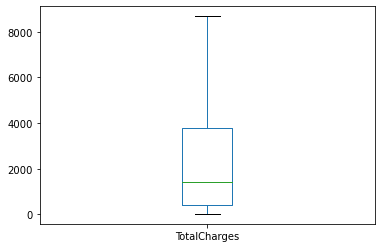

In [57]:
df['TotalCharges'].plot.box()

outlier is not present.

<AxesSubplot:>

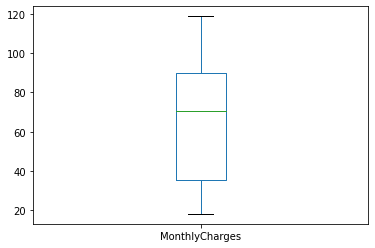

In [58]:
df['MonthlyCharges'].plot.box()

outlier is not prsent

# SEPRATING THE COLUMNS INTO FEATURES AND TARGET

In [27]:
x=df.drop('Churn',axis=1)
y=df['Churn']

# HANDLING CLASS IMBALANCE PROBLEM BY OVERSAMPLING THE MINORITY CLASS

In [28]:
# In Target column Differece is more between yes and no
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over, y_over=SM.fit_resample(x,y)


In [29]:
y_over.value_counts()

0.0    5174
1.0    5174
Name: Churn, dtype: int64

# TRAIN TEST SPLIT

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.22, random_state=47)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5493, 20)
(1550, 20)
(5493,)
(1550,)


# MODEL BUILDING

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [32]:
#LogisticRegression
lr=LogisticRegression()
lr.fit(x_train, y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))
    
    

0.7890322580645162
[[1012  124]
 [ 203  211]]
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1136
         1.0       0.63      0.51      0.56       414

    accuracy                           0.79      1550
   macro avg       0.73      0.70      0.71      1550
weighted avg       0.78      0.79      0.78      1550



In [33]:
# Logistic Regression Cross Validation

scr=cross_val_score(lr,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.7996596554616426


Accuracy score is 78% and cv score is 79% of Logistic Reression.

In [34]:
# AUC ROC CURVE Logistic Regression
lr.fit(x_train,y_train)
y_pred_proba=lr.predict_proba(x_test)[:,1]

In [35]:
y_pred_proba

array([0.01850352, 0.08779182, 0.18609909, ..., 0.10557904, 0.00999488,
       0.16096037])

In [36]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
fpr
tpr

array([0.        , 0.00241546, 0.03381643, 0.03381643, 0.04830918,
       0.04830918, 0.05797101, 0.05797101, 0.06038647, 0.06038647,
       0.07729469, 0.07729469, 0.08937198, 0.08937198, 0.09661836,
       0.09661836, 0.10144928, 0.10144928, 0.10628019, 0.10628019,
       0.12077295, 0.12077295, 0.12801932, 0.12801932, 0.13285024,
       0.13285024, 0.16425121, 0.16425121, 0.16908213, 0.16908213,
       0.17149758, 0.17149758, 0.17391304, 0.17391304, 0.18115942,
       0.18115942, 0.1884058 , 0.1884058 , 0.19806763, 0.19806763,
       0.20048309, 0.20048309, 0.21014493, 0.21014493, 0.21256039,
       0.21256039, 0.21497585, 0.21497585, 0.2173913 , 0.2173913 ,
       0.22222222, 0.22222222, 0.23188406, 0.23188406, 0.23429952,
       0.23429952, 0.23913043, 0.23913043, 0.24154589, 0.24154589,
       0.26086957, 0.26086957, 0.26328502, 0.26328502, 0.26570048,
       0.26570048, 0.27294686, 0.27294686, 0.28985507, 0.28985507,
       0.29468599, 0.29468599, 0.29951691, 0.29951691, 0.30676

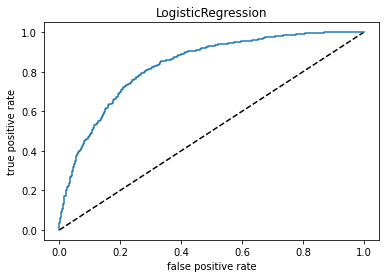

In [37]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('LogisticRegression')
plt.show()

In [38]:
auc_score=roc_auc_score(y_test,lr.predict(x_test))
print(auc_score)

0.7002534530856638


Auc_score of Logistic Regression is 70%

In [39]:
# AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))


0.7903225806451613
[[1012  124]
 [ 201  213]]
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1136
         1.0       0.63      0.51      0.57       414

    accuracy                           0.79      1550
   macro avg       0.73      0.70      0.71      1550
weighted avg       0.78      0.79      0.78      1550



In [40]:
#For AdaBoostClassifier cross validation
scr=cross_val_score(ad,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.8003683705400348


Accuracy score is 79% and cv score is 80% of adaboost classifier

In [41]:
# AUC ROC CURVE adaboost classifier
ad.fit(x_train,y_train)
y_pred_prob=ad.predict_proba(x_test)[:,1]


In [42]:
y_pred_prob

array([0.47535135, 0.49165588, 0.49430553, ..., 0.48696321, 0.47897854,
       0.49359786])

In [43]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
fpr
tpr

array([0.        , 0.00241546, 0.00241546, 0.00483092, 0.01207729,
       0.01449275, 0.01932367, 0.02657005, 0.02657005, 0.03381643,
       0.03864734, 0.0410628 , 0.04830918, 0.05797101, 0.06763285,
       0.07246377, 0.07487923, 0.07487923, 0.08937198, 0.08937198,
       0.09178744, 0.09661836, 0.10386473, 0.10628019, 0.10628019,
       0.11111111, 0.11111111, 0.11594203, 0.11835749, 0.13043478,
       0.1352657 , 0.13768116, 0.13768116, 0.14009662, 0.14251208,
       0.147343  , 0.147343  , 0.14975845, 0.14975845, 0.15217391,
       0.15217391, 0.15458937, 0.15458937, 0.15700483, 0.15942029,
       0.15942029, 0.16908213, 0.17391304, 0.18599034, 0.19082126,
       0.19565217, 0.20289855, 0.20531401, 0.20531401, 0.21014493,
       0.21014493, 0.21497585, 0.21497585, 0.21980676, 0.22222222,
       0.22705314, 0.22705314, 0.23188406, 0.23188406, 0.23671498,
       0.23671498, 0.23913043, 0.23913043, 0.25362319, 0.25362319,
       0.25845411, 0.25845411, 0.26086957, 0.26086957, 0.26328

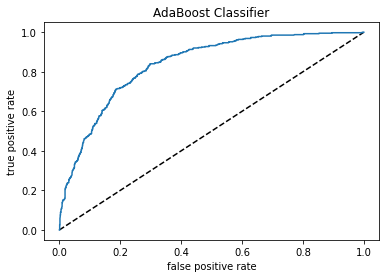

In [44]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoost Classifeir')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('AdaBoost Classifier')
plt.show()

In [45]:
auc_score=roc_auc_score(y_test,ad.predict(x_test))
print(auc_score)

0.7026689120228619


Auc_score of Adaboost Classifier is 70%

In [46]:
# RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.7929032258064516
[[1029  107]
 [ 214  200]]
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      1136
         1.0       0.65      0.48      0.55       414

    accuracy                           0.79      1550
   macro avg       0.74      0.69      0.71      1550
weighted avg       0.78      0.79      0.78      1550



In [48]:
# Random FOrest Cross Validation

scr=cross_val_score(rf,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.7911421704626105


Accuracy score is 79.54% and cv score is 79.34% of Random Forest Classifier.

In [80]:
# AUC ROC CURVE RANDOM FOREST CLASSIFIER
rf.fit(x_train,y_train)
y_pred_prob=rf.predict_proba(x_test)[:,1]


In [81]:
y_pred_prob

array([0.  , 0.18, 0.42, ..., 0.09, 0.  , 0.18])

In [82]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
fpr
tpr

array([0.        , 0.00483092, 0.01207729, 0.01690821, 0.02415459,
       0.02657005, 0.02898551, 0.03623188, 0.0531401 , 0.06280193,
       0.07004831, 0.07246377, 0.0821256 , 0.0942029 , 0.11352657,
       0.12318841, 0.13285024, 0.14009662, 0.14975845, 0.16183575,
       0.16666667, 0.17874396, 0.18599034, 0.20289855, 0.20772947,
       0.22222222, 0.23913043, 0.24396135, 0.26328502, 0.27294686,
       0.28019324, 0.29468599, 0.30917874, 0.3236715 , 0.34299517,
       0.35507246, 0.37439614, 0.38647343, 0.39613527, 0.4057971 ,
       0.41304348, 0.42753623, 0.43719807, 0.45410628, 0.47584541,
       0.48067633, 0.49516908, 0.50483092, 0.51207729, 0.52173913,
       0.53623188, 0.54347826, 0.56763285, 0.58695652, 0.5942029 ,
       0.60628019, 0.62318841, 0.63768116, 0.647343  , 0.65942029,
       0.66666667, 0.66908213, 0.68357488, 0.68599034, 0.69806763,
       0.71014493, 0.72222222, 0.73188406, 0.74637681, 0.75845411,
       0.76086957, 0.76811594, 0.78502415, 0.80193237, 0.81159

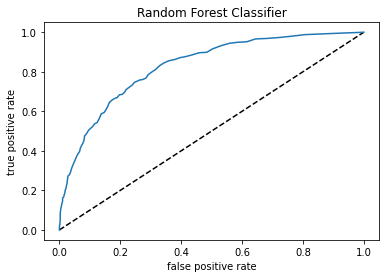

In [83]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifeir')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Random Forest Classifier')
plt.show()

In [84]:
auc_score=roc_auc_score(y_test,rf.predict(x_test))
print(auc_score)

0.7013697523304075


Auc_score of Random Forest Classifier is 70%

In [85]:
#DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.7361290322580645
[[940 196]
 [213 201]]
              precision    recall  f1-score   support

         0.0       0.82      0.83      0.82      1136
         1.0       0.51      0.49      0.50       414

    accuracy                           0.74      1550
   macro avg       0.66      0.66      0.66      1550
weighted avg       0.73      0.74      0.73      1550



In [86]:
# For DecisionTreeClassifier cross validation
scr=cross_val_score(dt,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.7261118660881347


Accuracy score is 73% and cross validation score is 72% for Decision Tree classifier.

In [88]:
# AUC ROC CURVE DECISION TREE CLASSIFIER
dt.fit(x_train,y_train)
y_pred_prob=dt.predict_proba(x_test)[:,1]


In [89]:
y_pred_prob

array([0., 0., 0., ..., 0., 0., 0.])

In [90]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
fpr
tpr

array([0.       , 0.4589372, 1.       ])

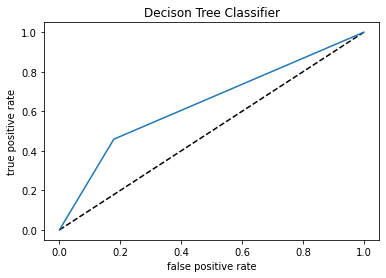

In [91]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classifeir')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Decison Tree Classifier')
plt.show()

In [92]:
auc_score=roc_auc_score(y_test,dt.predict(x_test))
print(auc_score)

0.6401200074845208


Auc_score of Decision Tree Classifier is 64%.

In [93]:
# GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.7593548387096775
[[887 249]
 [124 290]]
              precision    recall  f1-score   support

         0.0       0.88      0.78      0.83      1136
         1.0       0.54      0.70      0.61       414

    accuracy                           0.76      1550
   macro avg       0.71      0.74      0.72      1550
weighted avg       0.79      0.76      0.77      1550



In [94]:
# For GaussianNb cross validation
scr=cross_val_score(gnb,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.7537994386734628


Accuracy score is 75.93% and cv score is 75.37% for gaussianNB.

In [95]:
# AUC ROC CURVE GAUSSIANNB
gnb.fit(x_train,y_train)
y_pred_prob=gnb.predict_proba(x_test)[:,1]


In [96]:
y_pred_prob

array([5.10293434e-07, 4.74573500e-04, 8.10519523e-01, ...,
       7.21730026e-06, 4.03891855e-08, 9.82753236e-05])

In [97]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
fpr
tpr

array([0.        , 0.00241546, 0.02173913, 0.02173913, 0.02657005,
       0.02657005, 0.02898551, 0.02898551, 0.03140097, 0.03140097,
       0.03864734, 0.03864734, 0.06521739, 0.06521739, 0.06763285,
       0.06763285, 0.07004831, 0.07004831, 0.0821256 , 0.0821256 ,
       0.0942029 , 0.0942029 , 0.11111111, 0.11111111, 0.12077295,
       0.12077295, 0.12318841, 0.12318841, 0.12801932, 0.12801932,
       0.15942029, 0.15942029, 0.16425121, 0.16425121, 0.17391304,
       0.17391304, 0.17874396, 0.17874396, 0.19323671, 0.19323671,
       0.20048309, 0.20048309, 0.20289855, 0.20289855, 0.20772947,
       0.20772947, 0.21497585, 0.21497585, 0.22463768, 0.22463768,
       0.22705314, 0.22705314, 0.2294686 , 0.2294686 , 0.23671498,
       0.23671498, 0.24396135, 0.24396135, 0.24637681, 0.24637681,
       0.25362319, 0.25362319, 0.26570048, 0.26570048, 0.26811594,
       0.26811594, 0.2705314 , 0.2705314 , 0.27777778, 0.27777778,
       0.28502415, 0.28502415, 0.28985507, 0.28985507, 0.29710

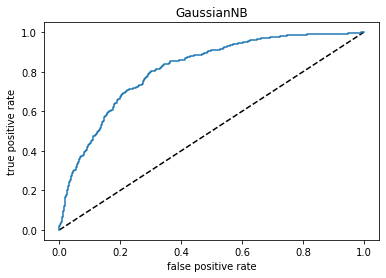

In [98]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GaussianNB')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('GaussianNB')
plt.show()

In [99]:
auc_score=roc_auc_score(y_test,gnb.predict(x_test))
print(auc_score)

0.7406464754711846


Auc_score of GaussianNB is 74%.

In [100]:
# SVC
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7329032258064516
[[1136    0]
 [ 414    0]]
              precision    recall  f1-score   support

         0.0       0.73      1.00      0.85      1136
         1.0       0.00      0.00      0.00       414

    accuracy                           0.73      1550
   macro avg       0.37      0.50      0.42      1550
weighted avg       0.54      0.73      0.62      1550



In [101]:
# SVC cross validation

scr=cross_val_score(svc,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.7346301575908123


Accuracy Score is 73% and cv score is 73%

# HYPER PARAMETER TUNING OF MODEL


In [51]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV

ad=AdaBoostClassifier(n_estimators = 50, random_state=0)

grid_param={'algorithm':['SAMME', 'SAMME.R']}
           

gd_sr=GridSearchCV(estimator=ad,
                  param_grid=grid_param,
                  scoring='accuracy',
                  cv=5)

gd_sr.fit(x,y)

best_parameters =gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)


{'algorithm': 'SAMME'}
0.8026422067552745


# FINAL MODEL

In [53]:

final_mod=AdaBoostClassifier(algorithm='SAMME')
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

79.48387096774194


After Hyper parameter tuning the accuracy score is 79.48%.

# SAVING THE MODEL

In [54]:
import pickle
filename='churns.pkl'
pickle.dump(rf, open(filename, 'wb'))

# CONCLUSION

In [58]:
loaded_model=pickle.load(open('churns.pkl','rb'))
result=loaded_model.score(x_test, y_test)
print(result)

0.7929032258064516


Above predictions from the model , we can say that our model is performing  well, we are getting approx 79%% accuracy .

With the help of MODEL , I learnt how to done EDA.

I also learnt ,making use of packages like matplotlib and seaborn to develop better insights of the data.

I have also learnt how to remove outliers and skewness to predict better accuracy.

I have also seen the impacts on the columns on target columns..

I came to know through the analysis ,which model will predict better accuracy.

This project helped me to gain deep knowledge , and also get to know where to use models.

